In [2]:
import math

import numpy as np
import qiskit.quantum_info
from sympy import *
import random
from qiskit import *
from qiskit import IBMQ
import pylatexenc
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import linalg as sla
from IPython.display import clear_output
from numpy import linalg as la
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit import Parameter
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import *
from operator import itemgetter
from functools import reduce

In [3]:
file = open("key.txt", "r")
key = file.read()
IBMQ.save_account(key)
IBMQ.load_account()
provider = IBMQ.get_provider()

print(provider.backends())

backend = provider.get_backend('ibmq_belem')
# backend = provider.get_backend('ibmq_qasm_simulator')
# backend = provider.get_backend('simulator_statevector')
# simulator = Aer.get_backend('aer_simulator')
print(backend)

configrc.store_credentials:WARNING:2021-10-24 00:47:32,838: Credentials already present. Set overwrite=True to overwrite.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

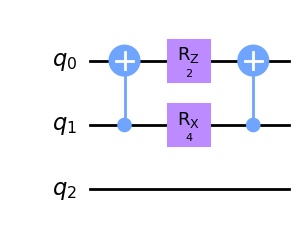

In [4]:
#turn on hadamards to get all 4 states present
def make_cont_sys_circ(inTime, xMod, zMod):
    temp = QuantumCircuit(3)

    # temp.h(0)

    temp.cx(1, 0)

    temp.rx(2 * xMod * inTime, 1)
    temp.rz(2 * zMod * inTime, 0)

    temp.cx(1, 0)

    # temp.h(0)

    return temp

temp = QuantumCircuit(3)

temp.compose(make_cont_sys_circ(1, 2, 1), [0, 1, 2], inplace=True)

temp.draw('mpl')

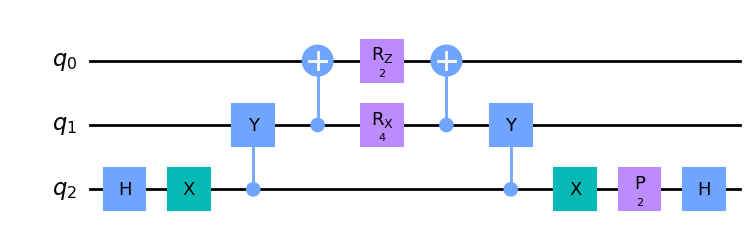

In [5]:
def make_cycle(time, ETarget, xMod, zMod):
    cycle = QuantumCircuit(3)

    cycle.h(2)

    cycle.x(2)
    cycle.cy(2, 1)

    cycle.compose(make_cont_sys_circ(time, xMod, zMod), [0, 1, 2], inplace=True)

    cycle.cy(2, 1)
    cycle.x(2)

    cycle.p(time * ETarget * 2, 2)

    cycle.h(2)

    return cycle

test = QuantumCircuit(3)
test.compose(make_cycle(1, 1, 2, 1), [0, 1, 2], inplace=True)
test.draw('mpl')

In [7]:
#TODO: Find way to gaurantee low overlap

t1 = np.random.normal(0, 5)
t2 = np.random.normal(0, 5)
t3 = np.random.normal(0, 5)
t4 = np.random.normal(0, 5)
t5 = np.random.normal(0, 5)

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

-3.0402061150187327
5.555011354142463
1.5209100953698265
3.1878647366280073
-10.186656037741702


-3.0: 
84
{'00000': 84, '00001': 92, '00010': 98, '00011': 331, '00100': 78, '00101': 77, '00110': 106, '00111': 158}
-1.0: 
532
{'00000': 532, '00001': 8, '00010': 42, '00011': 29, '00100': 3, '00101': 408, '00110': 1, '00111': 1}
1.0: 
134
{'00000': 134, '00001': 131, '00010': 174, '00011': 48, '00100': 113, '00101': 117, '00110': 247, '00111': 60}
3.0: 
514
{'00000': 514, '00001': 9, '00010': 44, '00011': 33, '00100': 4, '00101': 417, '00110': 1, '00111': 2}


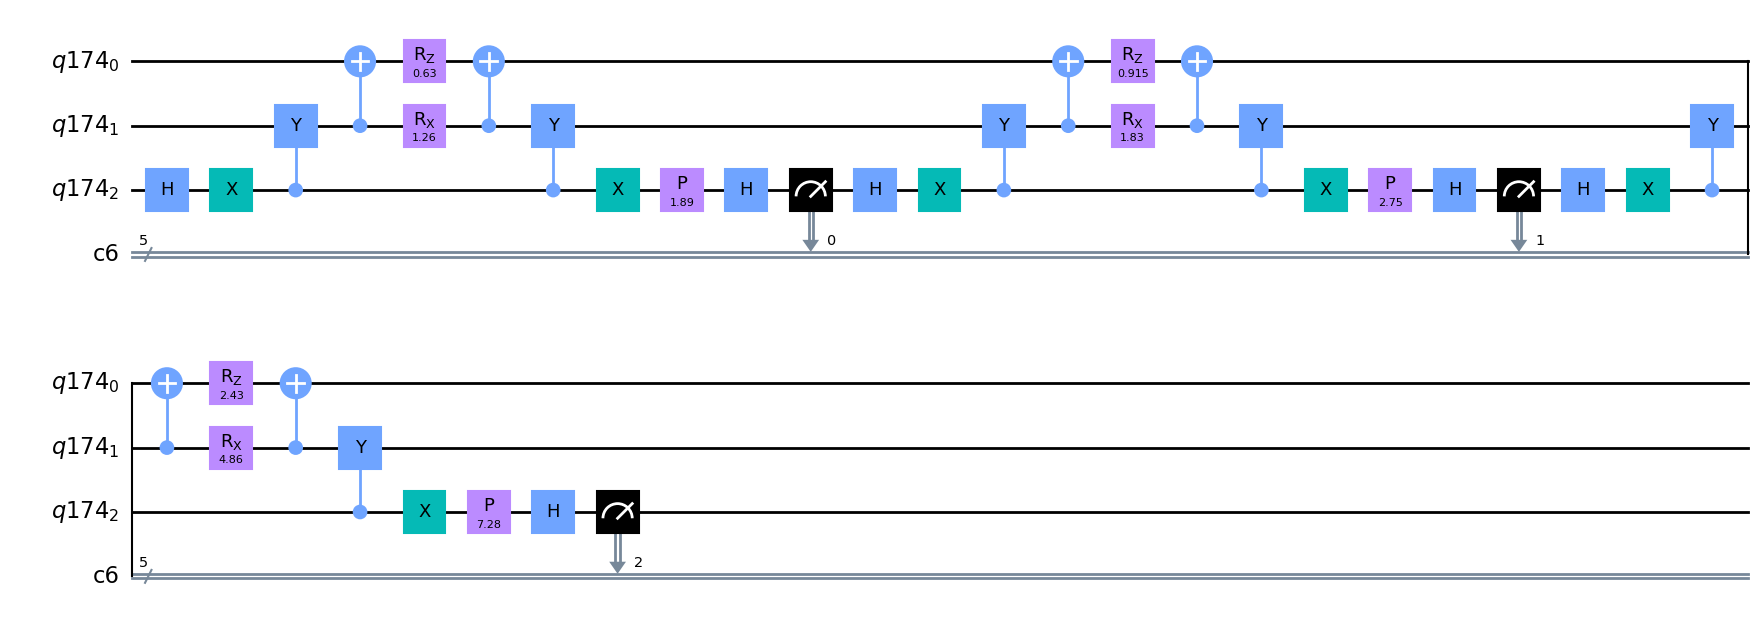

In [8]:
# Unused test code

specSuccess4 = list()
specAll4 = list()

vectors = [[0, 0, -1/sqrt(2), 0, 1/sqrt(2), 0, 0, 0], [1/sqrt(2), 0, 0, 0, 0, 0, 1/sqrt(2), 0], [-1/sqrt(2), 0, 0, 0, 0, 0, 1/sqrt(2), 0], [0, 0, 1/sqrt(2), 0, 1/sqrt(2), 0, 0, 0]]
#eigenstate (tensor) {1,0}
values = [-3, 3, -1, 1]

#initial_state = [1/sqrt(2), 0, 0, -1/sqrt(2), 0, 0, 0,0]
#initial_vector = qiskit.quantum_info.Statevector(initial_state)

for i in Range(4):
    energies = [-3, -1, 1, 3]
    eTarget = energies[i]
    # eTarget = -3 + (i) * 2
    # eTarget = i/10 - 5

    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(5))

    # rodeo.initialize(initial_vector)
    # rodeo.h(2)
    # rodeo.x(1)
    # rodeo.x(2)
    # rodeo.p(1, 0)

    rodeo.compose(make_cycle(t1, eTarget, 2, 1), [0, 1, 2], inplace=True)
    rodeo.measure(2, 0) #cbit 0000n

    rodeo.compose(make_cycle(t2, eTarget, 2, 1), [0, 1, 2], inplace=True)
    rodeo.measure(2, 1) #cbit 000n0

    rodeo.compose(make_cycle(t3, eTarget, 2, 1), [0, 1, 2], inplace=True)
    rodeo.measure(2, 2) #cbit 00n00
    #
    # rodeo.compose(make_cycle(t4, eTarget), [0, 1, 2], inplace=True)
    # rodeo.measure(0, 3) #cbit 0n000
    #
    # rodeo.compose(make_cycle(t5, eTarget), [0, 1, 2], inplace=True)
    # rodeo.measure(0, 4) #cbit n0000


    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    numSuccess = job.result().get_counts().get('00000')
    if numSuccess is None:
        numSuccess = 0

    print(numSuccess)
    specSuccess4.append(numSuccess)

    print(job.result().get_counts())

rodeo.draw('mpl')

In [6]:
def run_rodeo(times, numCycles, ETarget, xMod, zMod, twoStateTime = None):
    # debug printing
    # if twoStateTime is None:
    #     print('running energy = ' + str(ETarget))
    # else:
    #     print('running energy = ' + str(ETarget) + '; second time evolve is: ' + str(twoStateTime))

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(numCycles + 1))

    for i in range(numCycles):
        rodeo.compose(make_cycle(times[i], ETarget, xMod, zMod), [0, 1, 2], inplace=True)
        rodeo.measure(2, i + 1)

    if twoStateTime is not None:
        rodeo.compose(make_cont_sys_circ(twoStateTime, xMod, zMod), [0, 1, 2], inplace=True)
        rodeo.measure(1, 0)

    return rodeo

# old code from before job manager
# job = execute(rodeo, backend=backend)
# job.wait_for_final_state()
# state = '0'
# for i in range(numCycles):
#     state = state + '0'
#
# return job.result().get_counts().get(state)

times = list()
for i in range (3):
    times.append(np.random.normal(0, 5))
job = execute(run_rodeo(times, 3, -1, 2.5, 1.5), backend=backend)
job.wait_for_final_state()
state = '0'
for i in range(3):
    state = state + '0'

print(job.result().get_counts().get(state))

618


In [61]:
times = list()
for i in range (3):
    times.append(np.random.normal(0, 5))
state = '0'
for i in range(3):
    state = state + '0'

jobManager = IBMQJobManager()
circs = list()

for i in [-4, -1, 1, 4]:
    circs.append(run_rodeo(times, 3, i, 2.5, 1.5))
circs = transpile(circs, backend=backend)
job = jobManager.run(circs, backend=backend, name = "test eigenvalues")
results = job.results()
for i in range(4):
    print(results.get_counts(i).get(state))

running energy = -4
running energy = -1
running energy = 1
running energy = 4
297
216
245
268


In [7]:
#TODO: make threshold rigorous

def search_spectrum(linspace, threshold, numCycles, laterScanNum, numSecond, xMod, zMod):
    delta = abs(linspace[1]) - abs(linspace[0])
    length = linspace[0] - linspace[-1]

    runResults = list()
    energyList = list()

    state = '0'
    for i in range(numCycles):
        state = state + '0'
    jobManager = IBMQJobManager()

    peaks = list()
    firstRunCircs = list()
    for i in linspace:
        times = []
        for j in range(numCycles):
            times.append(np.random.normal(0, 2))
        firstRunCircs.append(run_rodeo(times, numCycles, i, xMod, zMod))
    print("first pass w/ energies")
    print(linspace)
    firstRunCircs = transpile(firstRunCircs, backend=backend)
    firstRunJob = jobManager.run(firstRunCircs, backend=backend, name = "first_pass")
    firstRunResults = firstRunJob.results()
    runResults.append(firstRunResults)
    energyList.append(linspace)

    for runNum in range(linspace.size):
        if firstRunResults.get_counts(runNum).get(state) is not None and firstRunResults.get_counts(runNum).get(state) >= threshold:
            peaks.append(linspace[runNum])
    print("second pass w/ peaks:")
    print(peaks)

    secondRunCircs = list()
    energyList.append([])
    for i in peaks:
        for j in np.linspace(i - delta/2, i + delta/2, laterScanNum):
            for num in range(numSecond):
                times = []
                for k in range(numCycles):
                    times.append(np.random.normal(0, 7))
                # print('energy: ' + str(j))
                secondRunCircs.append(run_rodeo(times, numCycles, j, xMod, zMod))
                energyList[1].append(j)

    secondRunCircs = transpile(secondRunCircs, backend=backend)
    secondRunJob = jobManager.run(secondRunCircs, backend=backend, name = "second_run")

    runResults.append(secondRunJob.results())
    print("done w/ second pass")

    return [runResults, energyList, state, [11, laterScanNum], [1, numSecond]]

In [8]:
#this code is genuinely terrible, but it works
#runNumber is 0 indexed
def process_data(output, runNumber):
    pairArray = []
    for i in range(int(len(output[1][runNumber]) / (output[4][runNumber]))):
        totalSuccess = 0
        for j in range(output[4][runNumber]):
            if output[0][runNumber].get_counts(i * output[4][runNumber] + j).get(output[2]) is not None:
                totalSuccess = totalSuccess + output[0][runNumber].get_counts(i * output[4][runNumber] + j).get(output[2])
        pairArray.append([output[1][runNumber][i * output[4][runNumber]], totalSuccess / output[4][runNumber]])

    subScans = []
    for i in range(int(len(pairArray) / output[3][runNumber])):
        temp = []
        for k in range(output[3][runNumber]):
            temp.append(pairArray[k + i * output[3][runNumber]])
        temp.reverse()
        subScans.append(temp)
    return subScans

In [9]:
def plot_scans(data):
    energy = []
    successes = []
    for i in data:
        for j in i:
            energy.append(j[0])
            if j[1] is not None:
                successes.append(j[1])

    hist1 = plt.bar(energy, successes, width=(0.8*(energy[1]-energy[0])))
    plt.show()

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-4.0, -1.0, 2.0, 4.0, 5.0]
done w/ second pass
2
[[[-4.5, 88.44], [-4.45, 147.12], [-4.4, 117.24], [-4.35, 119.32], [-4.3, 143.84], [-4.25, 99.52], [-4.2, 114.64], [-4.15, 187.32], [-4.1, 82.8], [-4.05, 145.68], [-4.0, 168.24], [-3.95, 132.24], [-3.9, 169.0], [-3.85, 142.16], [-3.8, 79.76], [-3.75, 123.36], [-3.7, 120.84], [-3.65, 122.28], [-3.6, 145.12], [-3.55, 142.92], [-3.5, 88.2]], [[-1.5, 148.44], [-1.4500000000000002, 168.0], [-1.4, 160.12], [-1.35, 142.64], [-1.3, 119.52], [-1.25, 164.48], [-1.2000000000000002, 104.84], [-1.15, 160.64], [-1.1, 205.08], [-1.05, 457.28], [-1.0, 616.48], [-0.95, 415.48], [-0.9, 216.08], [-0.8500000000000001, 145.44], [-0.8, 127.8], [-0.75, 60.36], [-0.7, 129.16], [-0.65, 160.24], [-0.6, 92.6], [-0.55, 112.6], [-0.5, 144.76]], [[1.5, 147.04], [1.5499999999999998, 194.48], [1.6, 94.68], [1.65, 144.88], [1.7, 148.24], [1.75, 100.08], [1.7999999999999998, 172.2

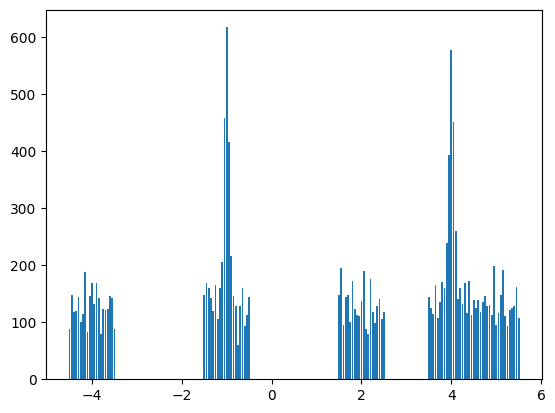

In [14]:
threeCycleOut = search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, 2.5, 1.5)
# print(threeCycleOut)
print(len(threeCycleOut[1][1]))
threeCycle2 = process_data(threeCycleOut, 1)
print(threeCycle2)

plot_scans(threeCycle2)

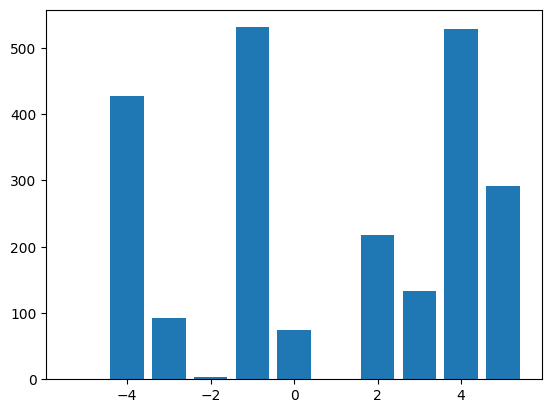

In [15]:
threeCycle1 = process_data(threeCycleOut, 0)
plot_scans(threeCycle1)

In [11]:
xmod1 = 1#.3359430644
zmod1 = 2.7803609513

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-2.0, 0.0, 2.0, 3.0, 4.0, 5.0]
done w/ second pass
[[[-2.5, 140.52], [-2.45, 151.12], [-2.4, 174.28], [-2.35, 101.96], [-2.3, 79.08], [-2.25, 131.04], [-2.2, 117.12], [-2.15, 127.08], [-2.1, 120.2], [-2.05, 114.64], [-2.0, 109.2], [-1.95, 113.96], [-1.9, 157.6], [-1.85, 154.84], [-1.8, 162.96], [-1.75, 205.48], [-1.7, 138.24], [-1.65, 119.72], [-1.6, 142.76], [-1.55, 175.4], [-1.5, 107.28]], [[-0.5, 79.0], [-0.45000000000000007, 71.92], [-0.4, 146.88], [-0.3500000000000001, 97.8], [-0.30000000000000004, 120.96], [-0.25, 127.6], [-0.20000000000000007, 100.96], [-0.15000000000000002, 112.64], [-0.10000000000000009, 119.56], [-0.050000000000000044, 118.64], [0.0, 126.76], [0.04999999999999999, 132.92], [0.09999999999999998, 104.52], [0.14999999999999997, 156.72], [0.19999999999999996, 111.4], [0.25, 66.16], [0.3, 110.8], [0.35, 149.96], [0.4, 114.0], [0.45, 112.44], [0.5, 124.92]], [[1.5, 120.52], 

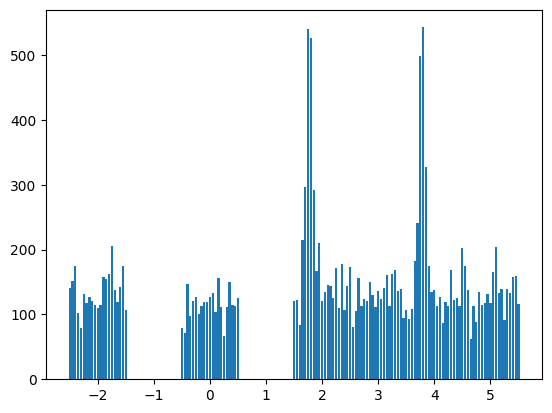

In [18]:
randomTest = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, xmod1, zmod1), 1)
print(randomTest)
plot_scans(randomTest)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-5.0, -2.0, -1.0, 2.0, 3.0, 4.0, 5.0]


managedjob._async_submit:WARNING:2021-10-22 15:10:56,110: Job limit reached, waiting for job 61730cb5731fe680eebce245 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:13:57,821: Job limit reached, waiting for job 61730cb8976ff9693281c634 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:14:28,294: Job limit reached, waiting for job 61730cba976ff983b481c635 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:14:56,945: Job limit reached, waiting for job 61730cbc976ff9bfea81c636 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:15:29,063: Job limit reached, waiting for job 61730cbe706f42c99d432c01 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:15:59,461: Job limit reached, waiting for job 61730d73731fe6551cbce24a to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10

done w/ second pass
[[[-5.5, 129.12], [-5.45, 165.8], [-5.4, 127.2], [-5.35, 111.0], [-5.3, 124.8], [-5.25, 130.16], [-5.2, 144.2], [-5.15, 144.24], [-5.1, 171.32], [-5.05, 141.12], [-5.0, 156.4], [-4.95, 146.72], [-4.9, 127.2], [-4.85, 131.16], [-4.8, 120.8], [-4.75, 127.8], [-4.7, 153.56], [-4.65, 135.88], [-4.6, 134.36], [-4.55, 123.16], [-4.5, 144.32]], [[-2.5, 149.16], [-2.45, 147.88], [-2.4, 108.6], [-2.35, 149.48], [-2.3, 155.72], [-2.25, 114.36], [-2.2, 148.56], [-2.15, 147.96], [-2.1, 133.28], [-2.05, 172.88], [-2.0, 112.44], [-1.95, 113.52], [-1.9, 124.64], [-1.85, 134.32], [-1.8, 166.96], [-1.75, 185.36], [-1.7, 168.2], [-1.65, 139.52], [-1.6, 169.16], [-1.55, 105.76], [-1.5, 129.2]], [[-1.5, 138.36], [-1.4500000000000002, 135.2], [-1.4, 142.44], [-1.35, 132.88], [-1.3, 120.6], [-1.25, 151.44], [-1.2000000000000002, 165.28], [-1.15, 119.56], [-1.1, 154.08], [-1.05, 113.72], [-1.0, 153.44], [-0.95, 148.28], [-0.9, 130.16], [-0.8500000000000001, 160.4], [-0.8, 165.08], [-0.75,

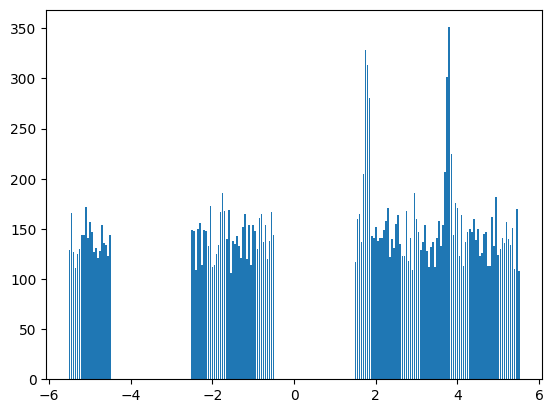

In [20]:
randomTestQ = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, xmod1, zmod1), 1)
print(randomTestQ)
plot_scans(randomTestQ)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-4.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0]


managedjob._async_submit:WARNING:2021-10-24 00:52:39,735: Job limit reached, waiting for job 6174e68d731fe62419bcf1b5 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:53:14,194: Job limit reached, waiting for job 6174e68f706f426d59433b60 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:53:43,384: Job limit reached, waiting for job 6174e6909e07dd733b57995b to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:54:11,400: Job limit reached, waiting for job 6174e6924829a00a7616262b to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:54:39,980: Job limit reached, waiting for job 6174e6946ab940b0d710ed9d to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:55:08,083: Job limit reached, waiting for job 6174e6b69e07ddb09257995d to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10

done w/ second pass
[[[-4.5, 250.92], [-4.45, 243.44], [-4.4, 314.52], [-4.35, 259.6], [-4.3, 207.16], [-4.25, 302.76], [-4.2, 245.92], [-4.15, 274.44], [-4.1, 253.52], [-4.05, 262.0], [-4.0, 271.2], [-3.95, 251.2], [-3.9, 230.48], [-3.85, 270.8], [-3.8, 267.64], [-3.75, 298.68], [-3.7, 298.36], [-3.65, 244.88], [-3.6, 209.24], [-3.55, 329.04], [-3.5, 336.72]], [[-2.5, 273.36], [-2.45, 258.12], [-2.4, 312.72], [-2.35, 316.96], [-2.3, 323.68], [-2.25, 266.4], [-2.2, 261.72], [-2.15, 283.08], [-2.1, 297.24], [-2.05, 280.36], [-2.0, 241.08], [-1.95, 275.68], [-1.9, 243.16], [-1.85, 281.92], [-1.8, 287.96], [-1.75, 253.88], [-1.7, 226.16], [-1.65, 278.4], [-1.6, 282.16], [-1.55, 314.64], [-1.5, 262.12]], [[-1.5, 243.6], [-1.4500000000000002, 256.92], [-1.4, 333.04], [-1.35, 290.84], [-1.3, 301.04], [-1.25, 270.52], [-1.2000000000000002, 282.64], [-1.15, 264.28], [-1.1, 310.84], [-1.05, 277.12], [-1.0, 328.56], [-0.95, 308.56], [-0.9, 262.68], [-0.8500000000000001, 316.16], [-0.8, 243.32], 

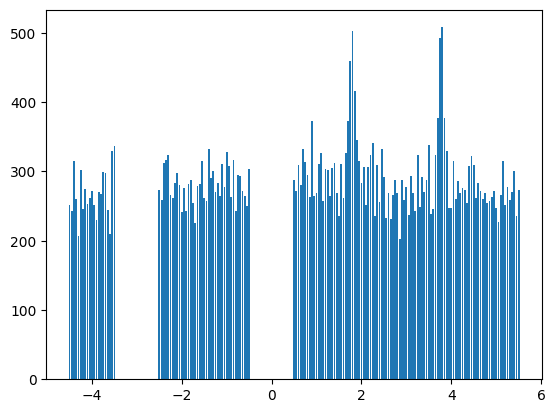

In [12]:
randomTestQ2 = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 2, 21, 25, xmod1, zmod1), 1)
print(randomTestQ2)
plot_scans(randomTestQ2)